## EXPLORATION - GPG UK - Government Equalities Office

### Data
Employers with 250 or more employees must publish and report specific figures about their gender pay gap.

Source: [Government Equalities Office](https://data.gov.uk/dataset/54219db1-dd98-49d9-a383-a5978bb0aeb9/gender-pay-gap).

Overview: https://www.gov.uk/guidance/gender-pay-gap-reporting-make-your-calculations

Guide to calculations [here](https://www.gov.uk/guidance/gender-pay-gap-reporting-make-your-calculations).

About the [written publication](https://www.gov.uk/guidance/gender-pay-gap-reporting-what-employers-must-publish).

### Exploratory Data Analysis
1. General Info
2. Missing Values
3. Ordinal Proportions
4. Correlation Matrix
5. Diff Hourly Wage
6. Bonuses.
7. Quartiles
8. SicCodes
9. Reports PDF (Pending)

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import colors
# %matplotlib inline
# %config InlineBackend.figure_format='retina'
plt.rcParams["font.family"] = "sans-serif"
# sns.set(font='sans-serif')

In [2]:
# path = "data/gpg-equalities-office.csv"
df = None

def load_raw(df):
    path = "data/gender-pay-gap-uk-gov/2017.csv"
    df = pd.read_csv(path)
    return df

df = load_raw(df)
rows = df.shape[0]; cols = df.shape[1]
print(f"Rows: {rows}"); print(f"Cols: {cols}")

Rows: 10562
Cols: 25


## 1 General Info

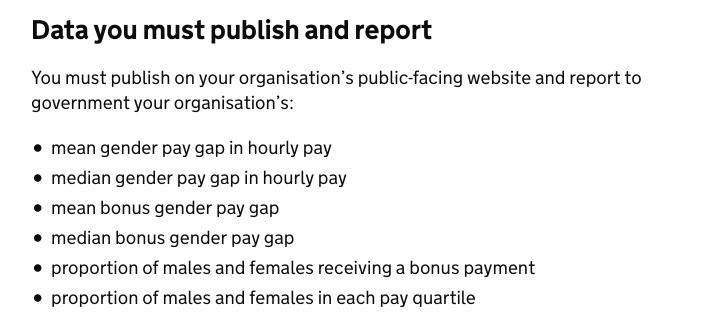

### Columns

1.   **EmployerName**
2.   **Address**
3.   **CompanyNumber**
4.   **SicCodes** Standard Industry Classification, four-digit code
5.   **DiffMeanHourlyPercent**
6.   **DiffMedianHourlyPercent**
7.   **DiffMeanBonusPercent**
8.   **DiffMedianBonusPercent**
9.   **MaleBonusPercent**
10.  **FemaleBonusPercent**
11.  **MaleLowerQuartile**
12.  **FemaleLowerQuartile**
13.  **MaleLowerMiddleQuartile**
13.  **FemaleLowerMiddleQuartile**
14.  **MaleUpperMiddleQuartile**
15.  **FemaleUpperMiddleQuartile**
14.  **MaleTopQuartile**
17.  **FemaleTopQuartile**
18.  **CompanyLinkToGPGInfo**
19.  **ResponsiblePerson**
20.  **EmployerSize** - 7 strates
21. **CurrentName**
22.  **SubmittedAfterTheDeadline**
23.  **DueDate**
24.  **DateSubmitted**         

In [3]:
df.head()

,EmployerName,Address,CompanyNumber,SicCodes,DiffMeanHourlyPercent,DiffMedianHourlyPercent,DiffMeanBonusPercent,DiffMedianBonusPercent,MaleBonusPercent,FemaleBonusPercent,...,FemaleUpperMiddleQuartile,MaleTopQuartile,FemaleTopQuartile,CompanyLinkToGPGInfo,ResponsiblePerson,EmployerSize,CurrentName,SubmittedAfterTheDeadline,DueDate,DateSubmitted
0,"""Bryanston School"",Incorporated","Bryanston House,\r\nBlandford,\r\nDorset,\r\nD...",00226143,85310,18.0,28.2,0.0,0.0,0.0,0.0,...,50.8,51.5,48.5,https://www.bryanston.co.uk/employment,Nick McRobb (Bursar and Clerk to the Governors),500 to 999,BRYANSTON SCHOOL INCORPORATED,False,05/04/2018 00:00:00,27/03/2018 11:42:49
1,"""RED BAND"" CHEMICAL COMPANY, LIMITED","19 Smith's Place,\r\nLeith Walk,\r\nEdinburgh,...",SC016876,47730,2.3,-2.7,15.0,37.5,15.6,66.7,...,89.7,18.1,81.9,NaN,Philip Galt (Managing Director),250 to 499,"""RED BAND"" CHEMICAL COMPANY, LIMITED",False,05/04/2018 00:00:00,28/03/2018 16:44:25
2,118 LIMITED,"3 Alexandra Gate Ffordd Pengam,\r\nGround Floo...",03951948,61900,1.7,2.8,13.1,13.6,70.0,57.0,...,50.0,58.0,42.0,NaN,"Emma Crowe (VP, Human Resources)",500 to 999,118 LIMITED,False,05/04/2018 00:00:00,27/03/2018 19:10:41
3,123 EMPLOYEES LTD,"34 Roundhay Road,\r\nLeeds,\r\nEngland,\r\nLS7...",10530651,78300,41.0,36.0,-69.8,-157.2,50.0,73.5,...,89.0,23.0,77.0,NaN,Chloe Lines (Financial Controller),250 to 499,123 EMPLOYEES LTD,True,05/04/2018 00:00:00,04/05/2018 11:24:06
4,1610 LIMITED,"Hestercombe House,\r\nCheddon Fitzpaine,\r\nTa...",06727055,93110,-22.0,-34.0,-47.0,-67.0,25.0,75.0,...,70.0,24.0,76.0,https://www.1610.org.uk/gender-pay-gap/,Tim Nightingale (CEO),250 to 499,1610 LIMITED,True,05/04/2018 00:00:00,12/04/2018 17:03:26


In [4]:
df.describe()

,DiffMeanHourlyPercent,DiffMedianHourlyPercent,DiffMeanBonusPercent,DiffMedianBonusPercent,MaleBonusPercent,FemaleBonusPercent,MaleLowerQuartile,FemaleLowerQuartile,MaleLowerMiddleQuartile,FemaleLowerMiddleQuartile,MaleUpperMiddleQuartile,FemaleUpperMiddleQuartile,MaleTopQuartile,FemaleTopQuartile
count,10562.000000,10562.000000,10542.000000,10542.000000,10562.000000,10562.000000,10562.000000,10562.000000,10562.000000,10562.000000,10562.000000,10562.000000,10562.000000,10562.000000
mean,14.343496,11.794887,7.662189,-21.754250,35.381235,33.915111,46.330572,53.669428,50.520365,49.479635,54.863861,45.136139,60.815518,39.184482
std,14.921568,15.842495,833.649838,1400.033523,36.327997,36.012276,24.128792,24.128792,26.091683,26.091683,26.223457,26.223457,24.400385,24.400385
min,-400.000000,-196.500000,-82000.000000,-120695.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.000000,0.700000,0.000000,0.000000,0.800000,0.300000,27.000000,35.700000,29.500000,27.625000,34.000000,21.500000,41.500000,17.125000
50%,13.300000,9.200000,22.000000,5.000000,19.300000,17.200000,44.300000,55.700000,48.300000,51.700000,54.000000,46.000000,62.700000,37.300000
75%,22.900000,21.000000,53.000000,38.000000,73.200000,70.000000,64.300000,73.000000,72.375000,70.500000,78.500000,66.000000,82.875000,58.500000
max,159.000000,121.200000,3848.200000,3848.200000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000


## 2 Missing values

#### Percentage of presence

In [5]:
def check_presence(df):
    return df.notnull().sum() / df.shape[0]
perc_of_presence = check_presence(df)
perc_of_presence

EmployerName                 1.000000
Address                      0.974153
CompanyNumber                0.871331
SicCodes                     0.946317
DiffMeanHourlyPercent        1.000000
DiffMedianHourlyPercent      1.000000
DiffMeanBonusPercent         0.998106
DiffMedianBonusPercent       0.998106
MaleBonusPercent             1.000000
FemaleBonusPercent           1.000000
MaleLowerQuartile            1.000000
FemaleLowerQuartile          1.000000
MaleLowerMiddleQuartile      1.000000
FemaleLowerMiddleQuartile    1.000000
MaleUpperMiddleQuartile      1.000000
FemaleUpperMiddleQuartile    1.000000
MaleTopQuartile              1.000000
FemaleTopQuartile            1.000000
CompanyLinkToGPGInfo         0.738118
ResponsiblePerson            0.841223
EmployerSize                 1.000000
CurrentName                  1.000000
SubmittedAfterTheDeadline    1.000000
DueDate                      1.000000
DateSubmitted                1.000000
dtype: float64

In [6]:
not_null_cols = df.columns[df.notnull().all()]
list(not_null_cols)

['EmployerName',
 'DiffMeanHourlyPercent',
 'DiffMedianHourlyPercent',
 'MaleBonusPercent',
 'FemaleBonusPercent',
 'MaleLowerQuartile',
 'FemaleLowerQuartile',
 'MaleLowerMiddleQuartile',
 'FemaleLowerMiddleQuartile',
 'MaleUpperMiddleQuartile',
 'FemaleUpperMiddleQuartile',
 'MaleTopQuartile',
 'FemaleTopQuartile',
 'EmployerSize',
 'CurrentName',
 'SubmittedAfterTheDeadline',
 'DueDate',
 'DateSubmitted']

#### Columns with empty values

In [7]:
cols_with_null = df.columns[df.isnull().any()]
list(cols_with_null)

['Address',
 'CompanyNumber',
 'SicCodes',
 'DiffMeanBonusPercent',
 'DiffMedianBonusPercent',
 'CompanyLinkToGPGInfo',
 'ResponsiblePerson']

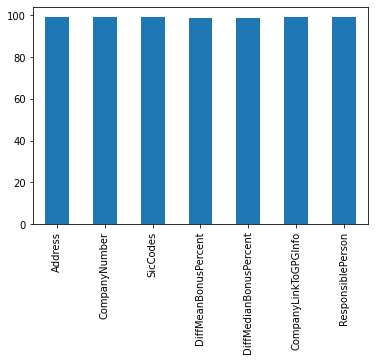

In [8]:
perc_of_absence = 100 - perc_of_presence
perc_of_absence[list(cols_with_null)].plot(x=cols_with_null, kind='bar')

## 3 Ordinal proportions

#### Company Size

Text(0, 0.5, 'Percentage of Companies')

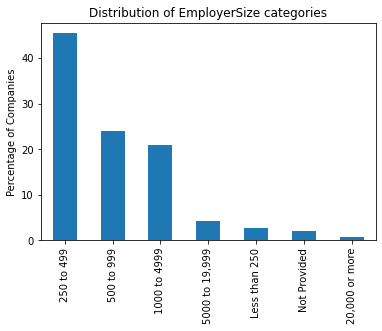

In [9]:
perc_company_size = (df['EmployerSize'].value_counts() / rows) * 100
ax = perc_company_size.plot(kind='bar',title='Distribution of EmployerSize categories')
ax.set_ylabel("Percentage of Companies")

#### Late submission

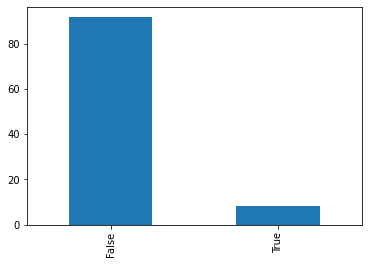

In [10]:
((df['SubmittedAfterTheDeadline'].value_counts() / rows) * 100).plot(kind='bar')

## 4 Correlations

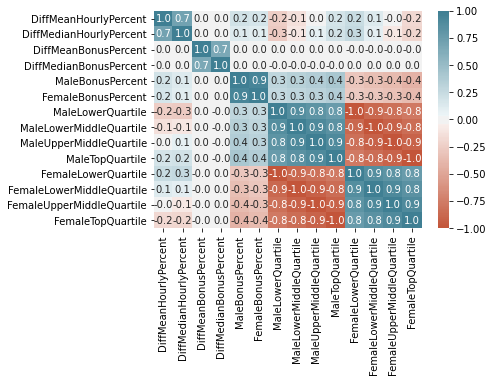

In [11]:
corr_mat = df[[
        'DiffMeanHourlyPercent', 'DiffMedianHourlyPercent',
        'DiffMeanBonusPercent', 'DiffMedianBonusPercent',
        'MaleBonusPercent', 'FemaleBonusPercent',
        'MaleLowerQuartile', 'MaleLowerMiddleQuartile',
        'MaleUpperMiddleQuartile', 'MaleTopQuartile',
        'FemaleLowerQuartile','FemaleLowerMiddleQuartile',
        'FemaleUpperMiddleQuartile','FemaleTopQuartile',
    ]].corr()
sns.heatmap(corr_mat, annot=True, fmt='.1f', cmap=sns.diverging_palette(20, 220, n=200));

### **5 Diff Hourly Percent**

The **mean** hourly rate is the average hourly wage across the entire organisation so the mean gender pay gap is a measure of the difference between women’s mean hourly wage and men’s mean hourly wage.

The **median** hourly rate is calculated by ranking all employees from the highest paid to the lowest paid, and taking the hourly wage of the person in the middle; so the median gender pay gap is the difference between women’s median hourly wage (the middle paid woman) and men’s median hourly wage (the middle paid man).

In [12]:
print(df['DiffMeanHourlyPercent'].describe())
print(df['DiffMedianHourlyPercent'].describe())

count    10562.000000
mean        14.343496
std         14.921568
min       -400.000000
25%          5.000000
50%         13.300000
75%         22.900000
max        159.000000
Name: DiffMeanHourlyPercent, dtype: float64
count    10562.000000
mean        11.794887
std         15.842495
min       -196.500000
25%          0.700000
50%          9.200000
75%         21.000000
max        121.200000
Name: DiffMedianHourlyPercent, dtype: float64


In [13]:
lower_lim = -100
upper_lim =  100
# ax.set_ylim(lower_lim, upper_lim)
# ax.set_xlim(lower_lim, upper_lim)

ignored_means   = df.loc[df['DiffMeanHourlyPercent'] <= lower_lim]
ignored_medians = df.loc[df['DiffMedianHourlyPercent'] <= lower_lim]
ignored_indexes = list(set((list(ignored_means.index) + list(ignored_medians.index))))

/Users/thor/.local/share/virtualenvs/data-exploration-2gHAQ7Cz/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


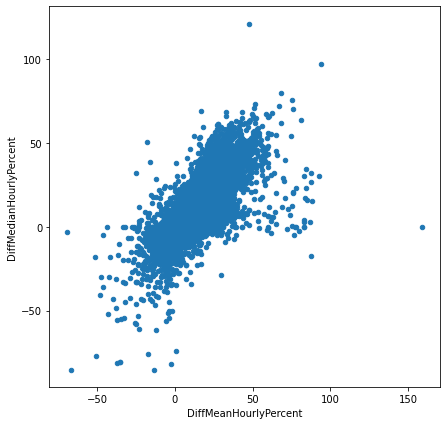

In [14]:
diff_mean_vs_median = df[['DiffMeanHourlyPercent', 'DiffMedianHourlyPercent']]
diff_mean_vs_median.drop(ignored_indexes, inplace=True)
diff_mean_vs_median.plot.scatter(x='DiffMeanHourlyPercent', y='DiffMedianHourlyPercent', figsize=(7,7))

       DiffMeanHourlyPercent  DiffMedianHourlyPercent
count           10557.000000             10557.000000
mean               14.424524                11.854959
std                14.167753                15.542374
min               -69.400000               -85.200000
25%                 5.000000                 0.700000
50%                13.400000                 9.300000
75%                22.900000                21.000000
max               159.000000               121.200000


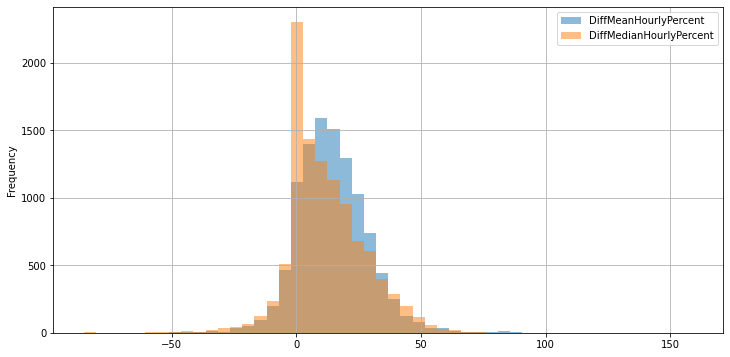

In [15]:
print(diff_mean_vs_median.describe())
diff_mean_vs_median.plot.hist(bins=50,alpha=0.5, figsize=(12,6),grid=True)

### 6 Bonus Percent

In [16]:
print(df['MaleBonusPercent'].describe())
print(df['FemaleBonusPercent'].describe())

count    10562.000000
mean        35.381235
std         36.327997
min          0.000000
25%          0.800000
50%         19.300000
75%         73.200000
max        100.000000
Name: MaleBonusPercent, dtype: float64
count    10562.000000
mean        33.915111
std         36.012276
min          0.000000
25%          0.300000
50%         17.200000
75%         70.000000
max        100.000000
Name: FemaleBonusPercent, dtype: float64


How many companies pay bonuses?

In [17]:
df['PayBonus'] = (df['MaleBonusPercent'] > 0) & (df['FemaleBonusPercent'] > 0)
df['PayBonus'].value_counts() / rows

True     0.747775
False    0.252225
Name: PayBonus, dtype: float64

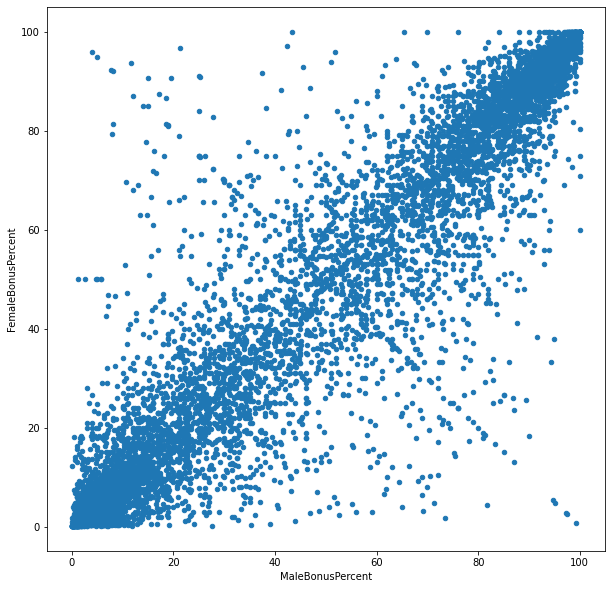

In [18]:
pay_bonus = df[df['PayBonus']]
pay_bonus.plot.scatter(x='MaleBonusPercent', y='FemaleBonusPercent', figsize=(10,10))

Sligh imbalance towards man.

Does the diagonal line mean people thought both percentages should sum 100?

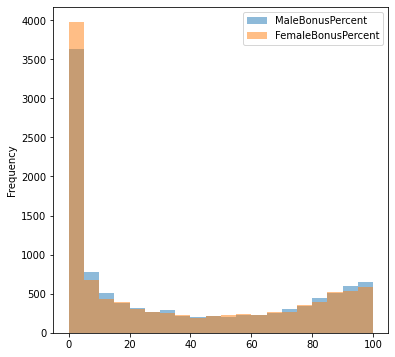

In [19]:
df[['MaleBonusPercent','FemaleBonusPercent']].plot.hist(bins=20,alpha=0.5,figsize=(6,6))

Female employees are granted with higher bonus only when it is 0-5%. In almost the rest man are slightly prefered. 

### 7 Quartiles
Pay quartiles are calculated by splitting all employees in an organisation into four even groups according to their level of pay. **Looking at the proportion of women in each quartile gives an indication of women's representation at different levels of the organisation**.

How quartiles are calculated can be found [here](https://www.gov.uk/guidance/gender-pay-gap-reporting-make-your-calculations#gender-pay-gap-quartile-figures-you-must-calculate).

In [20]:
female_quartiles = df[['FemaleLowerQuartile','FemaleLowerMiddleQuartile','FemaleUpperMiddleQuartile','FemaleTopQuartile']]
print(female_quartiles.describe())
female_quartiles.head()

       FemaleLowerQuartile  FemaleLowerMiddleQuartile  \
count         10562.000000               10562.000000   
mean             53.669428                  49.479635   
std              24.128792                  26.091683   
min               0.000000                   0.000000   
25%              35.700000                  27.625000   
50%              55.700000                  51.700000   
75%              73.000000                  70.500000   
max             100.000000                 100.000000   

       FemaleUpperMiddleQuartile  FemaleTopQuartile  
count               10562.000000       10562.000000  
mean                   45.136139          39.184482  
std                    26.223457          24.400385  
min                     0.000000           0.000000  
25%                    21.500000          17.125000  
50%                    46.000000          37.300000  
75%                    66.000000          58.500000  
max                   100.000000         100.000000  


,FemaleLowerQuartile,FemaleLowerMiddleQuartile,FemaleUpperMiddleQuartile,FemaleTopQuartile
0,75.6,49.2,50.8,48.5
1,79.7,74.6,89.7,81.9
2,49.0,47.0,50.0,42.0
3,100.0,98.0,89.0,77.0
4,44.0,48.0,70.0,76.0


### Female Representation per quartile

In [21]:
male_quartile = df[['MaleLowerQuartile', 'MaleLowerMiddleQuartile', 'MaleUpperMiddleQuartile', 'MaleTopQuartile']]
male_quartile['Sex'] = "Male"
male_quartile.rename(columns={
    "MaleLowerQuartile": "Lower",
    "MaleLowerMiddleQuartile": "LowerMiddle",
    "MaleUpperMiddleQuartile": "UpperMiddle",
    "MaleTopQuartile": "Top",
}, inplace=True)
male_quartile.shape

/Users/thor/.local/share/virtualenvs/data-exploration-2gHAQ7Cz/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/thor/.local/share/virtualenvs/data-exploration-2gHAQ7Cz/lib/python3.7/site-packages/pandas/core/frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


(10562, 5)

In [22]:
female_quartile = df[["FemaleLowerQuartile", "FemaleLowerMiddleQuartile", "FemaleUpperMiddleQuartile", "FemaleTopQuartile"]]
female_quartile["Sex"] = "Female"
female_quartile.rename(columns={
    "FemaleLowerQuartile": "Lower",
    "FemaleLowerMiddleQuartile": "LowerMiddle",
    "FemaleUpperMiddleQuartile": "UpperMiddle",
    "FemaleTopQuartile": "Top",
}, inplace=True)
female_quartile.shape

/Users/thor/.local/share/virtualenvs/data-exploration-2gHAQ7Cz/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


(10562, 5)

In [23]:
quartiles = male_quartile.append(female_quartile)
quartiles.shape

(21124, 5)

In [24]:
melt_quartiles = pd.melt(quartiles,
        id_vars=['Sex'], var_name='Quartile',
        value_vars=['Lower', 'LowerMiddle', 'UpperMiddle', 'Top'],
        value_name='Percentage'
)
melt_quartiles.sample(5)

,Sex,Quartile,Percentage
53403,Female,UpperMiddle,15.5
66290,Male,Top,68.4
38575,Female,LowerMiddle,64.0
33321,Female,LowerMiddle,93.0
8227,Male,Lower,18.9


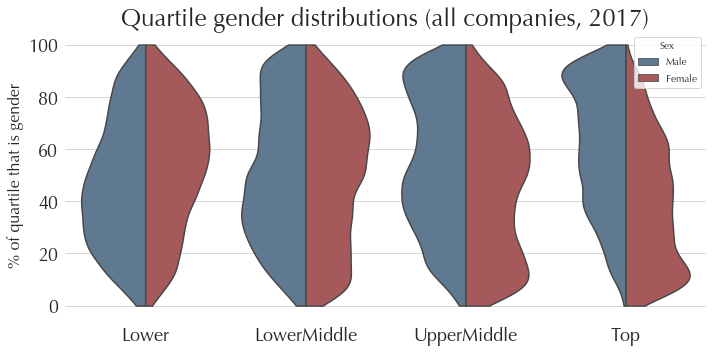

In [46]:
from matplotlib.lines import Line2D
from matplotlib import colors
import matplotlib as mpl
sns.set_style("whitegrid", {
    'font.family': 'Optima',
})
mpl.rcParams['font.family'] = 'Optima'
mpl.rcParams['text.usetex'] = 'False'


fig, ax = plt.subplots(figsize=(10,5))
ax.set_title("Quartile gender distributions (all companies, 2017)", **{'fontsize': 24})
sns.despine(left=True, bottom=True)
palette = sns.color_palette("Set1", n_colors=8, desat=.5)
x = palette[0]
y = palette[1]
palette[1] = palette[0]
palette[0] = y
ax = sns.violinplot(
    data=melt_quartiles, x="Quartile", y="Percentage", hue="Sex", ax=ax, cut=0, split=True,
     inner=None, palette=palette
)
plt.tick_params(axis='y', which='both', labelleft=True, labelright=False, labelsize=18)
plt.tick_params(axis='x', which='both', labeltop=False, labelbottom=True, labelsize=18)
ax.set_xlabel('')
ax.set_ylabel('% of quartile that is gender', **{'fontsize': 16})

plt.tight_layout()
fig.savefig("Visualizations/2017-all-companies-quartiles.png", dpi=150)

### 8 SicCodes

In [47]:
# df = load_raw(df)
df['SicCodes'] = df['SicCodes'].astype(str)
df['SicCodes'].value_counts()

nan                                    567
82990                                  446
1                                      336
1,\r\n84110                            306
70100                                  277
                                      ... 
21100,\r\n75000                          1
47250,\r\n47290,\r\n47710,\r\n49410      1
45190,\r\n45310                          1
8110,\r\n23910,\r\n42110,\r\n70100       1
91011,\r\n93110,\r\n93290                1
Name: SicCodes, Length: 1944, dtype: int64

In [48]:
df['SicCodes'] = df['SicCodes'].apply(lambda sic_code: sic_code\
                                 .replace('\r','').replace('\n','')\
                                 .split(','))
df['SicCodes'].head(10)

0                  [85310]
1                  [47730]
2                  [61900]
3                  [78300]
4                  [93110]
5           [56210, 70229]
6    [93110, 93130, 93290]
7           [86900, 88100]
8                  [56290]
9            [1470, 10910]
Name: SicCodes, dtype: object

In [49]:
print(df.shape)
df = df.explode('SicCodes')
print(df.shape)

(10562, 26)
(15499, 26)


In [50]:
df['SicCodes'].value_counts()

1        1733
nan       567
82990     566
85310     565
70100     372
         ... 
23440       1
23640       1
1430        1
74203       1
8910        1
Name: SicCodes, Length: 622, dtype: int64

In [51]:
# replace NaN to encode
df['SicCodes'] = df['SicCodes'].replace(to_replace='nan', value='0')
df['SicCodes'].value_counts()

1        1733
0         567
82990     566
85310     565
85200     372
         ... 
77400       1
2100        1
74203       1
10860       1
11060       1
Name: SicCodes, Length: 622, dtype: int64

In [52]:
# Change type to int in order to match with SicCodes
df['SicCodes'] = df['SicCodes'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15499 entries, 0 to 10561
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   EmployerName               15499 non-null  object 
 1   Address                    15200 non-null  object 
 2   CompanyNumber              13165 non-null  object 
 3   SicCodes                   15499 non-null  int64  
 4   DiffMeanHourlyPercent      15499 non-null  float64
 5   DiffMedianHourlyPercent    15499 non-null  float64
 6   DiffMeanBonusPercent       15464 non-null  float64
 7   DiffMedianBonusPercent     15464 non-null  float64
 8   MaleBonusPercent           15499 non-null  float64
 9   FemaleBonusPercent         15499 non-null  float64
 10  MaleLowerQuartile          15499 non-null  float64
 11  FemaleLowerQuartile        15499 non-null  float64
 12  MaleLowerMiddleQuartile    15499 non-null  float64
 13  FemaleLowerMiddleQuartile  15499 non-null  flo

#### Exploring SicCodes dataset

In [53]:
sic_codes = pd.read_csv("data/siccodes/uk-sic-2007-condensed_csv.csv")
print(sic_codes.shape)
sic_codes.head(30)

(731, 5)


,sic_code,sic_description,section,section_description,sic_version
0,1110,"Growing of cereals (except rice), leguminous c...",A,"Agriculture, Forestry and Fishing",SIC 2007
1,1120,Growing of rice,A,"Agriculture, Forestry and Fishing",SIC 2007
2,1130,"Growing of vegetables and melons, roots and tu...",A,"Agriculture, Forestry and Fishing",SIC 2007
3,1140,Growing of sugar cane,A,"Agriculture, Forestry and Fishing",SIC 2007
4,1150,Growing of tobacco,A,"Agriculture, Forestry and Fishing",SIC 2007
5,1160,Growing of fibre crops,A,"Agriculture, Forestry and Fishing",SIC 2007
6,1190,Growing of other non-perennial crops,A,"Agriculture, Forestry and Fishing",SIC 2007
7,1210,Growing of grapes,A,"Agriculture, Forestry and Fishing",SIC 2007
8,1220,Growing of tropical and subtropical fruits,A,"Agriculture, Forestry and Fishing",SIC 2007
9,1230,Growing of citrus fruits,A,"Agriculture, Forestry and Fishing",SIC 2007


In [54]:
sic_codes.nunique()

sic_code               731
sic_description        731
section                 21
section_description     21
sic_version              1
dtype: int64

In [55]:
sic_codes.drop('sic_version', axis='columns', inplace=True)
sic_codes.columns

Index(['sic_code', 'sic_description', 'section', 'section_description'], dtype='object')

In [56]:
sic_codes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   sic_code             731 non-null    int64 
 1   sic_description      731 non-null    object
 2   section              731 non-null    object
 3   section_description  731 non-null    object
dtypes: int64(1), object(3)
memory usage: 23.0+ KB


In [57]:
sic_codes = sic_codes.rename(columns={"sic_code": "SicCodes"})

#### Merge Description

In [58]:
# This drops 0's (NaN) an 1's (Unknown data)
mdf = pd.merge(df, sic_codes, on=['SicCodes'])
mdf.shape

(13199, 29)

In [59]:
check_presence(mdf)

EmployerName                 1.000000
Address                      0.998257
CompanyNumber                0.912872
SicCodes                     1.000000
DiffMeanHourlyPercent        1.000000
DiffMedianHourlyPercent      1.000000
DiffMeanBonusPercent         0.998333
DiffMedianBonusPercent       0.998333
MaleBonusPercent             1.000000
FemaleBonusPercent           1.000000
MaleLowerQuartile            1.000000
FemaleLowerQuartile          1.000000
MaleLowerMiddleQuartile      1.000000
FemaleLowerMiddleQuartile    1.000000
MaleUpperMiddleQuartile      1.000000
FemaleUpperMiddleQuartile    1.000000
MaleTopQuartile              1.000000
FemaleTopQuartile            1.000000
CompanyLinkToGPGInfo         0.738692
ResponsiblePerson            0.872718
EmployerSize                 1.000000
CurrentName                  1.000000
SubmittedAfterTheDeadline    1.000000
DueDate                      1.000000
DateSubmitted                1.000000
PayBonus                     1.000000
sic_descript

In [60]:
mdf['SicCodes'].value_counts()

82990    566
85310    565
85200    372
70100    372
84110    332
        ... 
11060      1
26600      1
1410       1
2100       1
77310      1
Name: SicCodes, Length: 620, dtype: int64

,section,section_description
13198,A,"Agriculture, Forestry and Fishing"
12455,B,Mining and Quarrying
10204,C,Manufacturing
12198,D,"Electricity, gas, steam and air conditioning s..."
11059,E,"Water supply, sewerage, waste management and"
4559,F,Construction
4130,G,Wholesale and retail trade; repair of motor ve...
6125,H,Transportation and storage
10038,I,Accommodation and food service activities
6876,J,Information and communication


\emph{{Code}} & \emph{{Description}} & \\\hline
A & Agriculture, Forestry and Fishing \\
B & Mining and Quarrying \\
C & Manufacturing \\
D & Electricity, gas, steam and air conditioning supply \\
E & Water supply, sewerage, waste management and \\
F & Construction \\
G & Wholesale and retail trade; repair of motor vehicles and \\
H & Transportation and storage \\
I & Accommodation and food service activities \\
J & Information and communication \\
K & Financial and insurance activities \\
L & Real estate activities \\
M & Professional, scientific and technical activities \\
N & Administrative and support service activities \\
O & Public administration and defence; compulsory social \\
P & Education \\
Q & Human health and social work activities \\
R & Arts, entertainment and recreation \\
S & Other service activities \\
T & Activities of households as employers; undifferentiated \\
U & Activities of extraterritorial organisations and \\
\hline


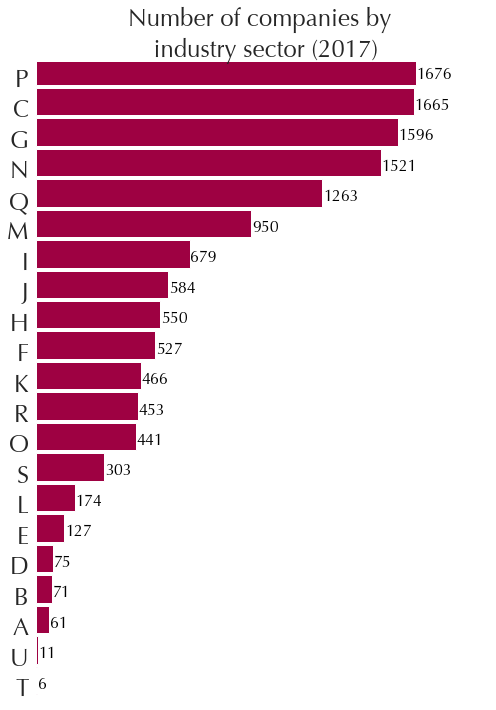

In [133]:


tmp = mdf[['section', 'section_description']].sort_values(by='section').drop_duplicates()
display(tmp)

fig, ax = plt.subplots(1,1, figsize=(7,10))

tmp = mdf['section'].value_counts().sort_values().plot(kind='barh',ax=ax,cmap='Spectral')
ax.set_title("Number of companies by \n industry sector (2017)", **{'fontsize': '24'})

ax.set_xlabel("Number of companies")
plt.tick_params(axis='y', which='both', labelleft=True, labelright=False, labelsize=24)
plt.tick_params(axis='x', which='both', labeltop=False, labelbottom=True, labelsize=18)
ax.set_xlabel('')
for container in ax.containers:
              plt.setp(container, height=0.9)
        
for i, v in enumerate(mdf['section'].value_counts().sort_values()):
    ax.text(v + 3, i - .06, str(v), color='k', fontsize='16')

plt.xlim([0, 2000])
ax.set_xticks([])
ax.grid(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
       
plt.tight_layout()
fig.savefig("Visualizations/2017-all-companies-sectors.png", dpi=100)

print("\\emph{{Code}} & \\emph{{Description}} & \\\\\\hline")
for idx, data in mdf[['section', 'section_description']].sort_values(by='section').drop_duplicates().iterrows():
    print("{} & {} \\\\".format(data.section, data.section_description))
print("\\hline")


In [71]:
education = mdf[mdf['section_description']=='Education']
education[education.EmployerName.str.contains('Bristol')]

,EmployerName,Address,CompanyNumber,SicCodes,DiffMeanHourlyPercent,DiffMedianHourlyPercent,DiffMeanBonusPercent,DiffMedianBonusPercent,MaleBonusPercent,FemaleBonusPercent,...,ResponsiblePerson,EmployerSize,CurrentName,SubmittedAfterTheDeadline,DueDate,DateSubmitted,PayBonus,sic_description,section,section_description
62,Bristol Grammar School,"Bristol Grammar School,\r\nUniversity Road,\r\...",05142007,85310,14.6,19.7,0.0,0.0,0.0,0.0,...,Gerry Mitchell (Bursar),250 to 499,BRISTOL GRAMMAR SCHOOL,False,05/04/2018 00:00:00,23/03/2018 11:55:39,False,General secondary education,P,Education
4791,Bristol Grammar School,"Bristol Grammar School,\r\nUniversity Road,\r\...",05142007,85200,14.6,19.7,0.0,0.0,0.0,0.0,...,Gerry Mitchell (Bursar),250 to 499,BRISTOL GRAMMAR SCHOOL,False,05/04/2018 00:00:00,23/03/2018 11:55:39,False,Primary education,P,Education
4823,Diocese of Bristol Academies Trust,"First Floor Hillside House 1500 Parkway North,...",08156759,85200,31.2,33.3,0.0,0.0,0.0,0.0,...,NaN,250 to 499,DIOCESE OF BRISTOL ACADEMIES TRUST,False,31/03/2018 00:00:00,26/03/2018 11:53:03,False,Primary education,P,Education
10500,University Of Bristol,"Senate House,\r\nBristol,\r\nAvon,\r\nBS8 1UB",RC000648,85421,21.1,16.2,58.1,50.0,3.2,3.0,...,NaN,"5000 to 19,999",UNIVERSITY OF BRISTOL,False,31/03/2018 00:00:00,08/03/2018 13:20:16,True,First-degree level higher education,P,Education
